<a href="https://colab.research.google.com/github/good0neighbour/ESTCampAI/blob/main/Deeplearning/YOLO02_Object_Detection(%EB%8F%99%EB%AC%BC_%EA%B0%9D%EC%B2%B4%ED%83%90%EC%A7%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Object Detection (객체 탐지)

1. Classification : 클래스를 분류하는 문제
2. Localization : 물체가 어딨는지 위치 정보를 나타내는 문제
3. Object Detection : Classification + Localization, 동시에 진행

### 학습 목표
- 동물을 탐지하는 모델 만들기

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ESTCampAI/Deeplearning

/content/drive/MyDrive/ESTCampAI/Deeplearning


In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OqE9vkYrrpAlmXS9WdW8")
project = rf.workspace("goodneighbour").project("animaldetection2class-ufclj")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 105.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to AnimalDetection2class-1 in yolov11:: 100%|██████████| 812/812 [00:09<00:00, 84.70it/s]


In [3]:
# 사전학습 모델 다운로드
!pip -q install ultralytics

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.4 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# 모델 로딩
model = YOLO("./data/yolo11n.pt")

In [5]:
# 학습
model.train(
    data = "./AnimalDetection2class-1/data.yaml",
    epochs = 100,
    imgsz = 640,
    patience = 10
)

Ultralytics 8.3.233 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./AnimalDetection2class-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=./data/yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plot

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a8d7a162540>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

### 객체탐지 평가지표

#### IoU (Intersection over Union)
-객체탐지를 수행하면, 실제 정답과 바운딩 박스가 얼마나 일치하는지에 대한 기준값

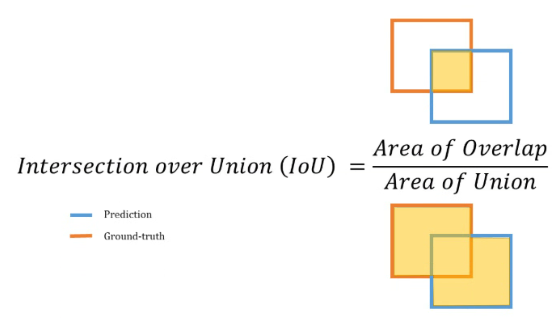

#### 분류 평가 지표
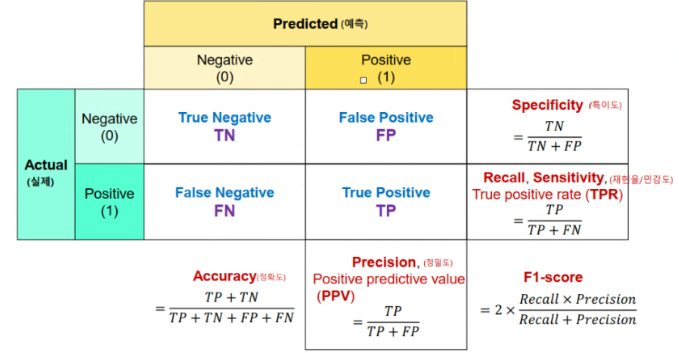

### Precision, Recall

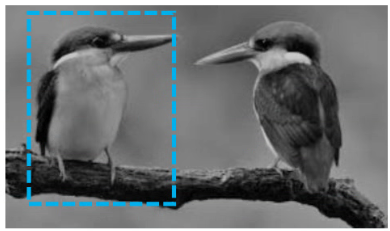

### Precision, Recall

> Precision(정밀도)
> - 모델이 찾았다라고 예측한 것 중에서, 실제로 맞춘 비율
> - 1 / 1 = 1.0 (예측한 거 1개가 전부 맞췄으므로 100%)

> Recall(재현율)
> - 실제 찾아야 할 것(Positive) 중에서, 모델이 몇 개나 제대로 찾았는지에 대한 비율
> - 1/2=0.5(전체 2마리 중에 1마리만 찾아냈으므로 50%)

### Object Detection에서 TP, FP, FN
- TN은 사용되지 않음 → 배경을 잘 맞추는 게 중요하지 않음

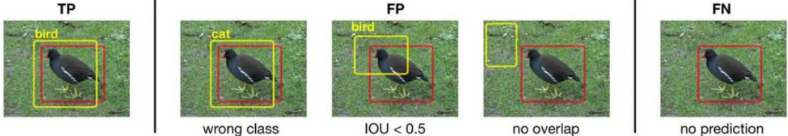

#### 정밀도와 재현율의 반비례 관계

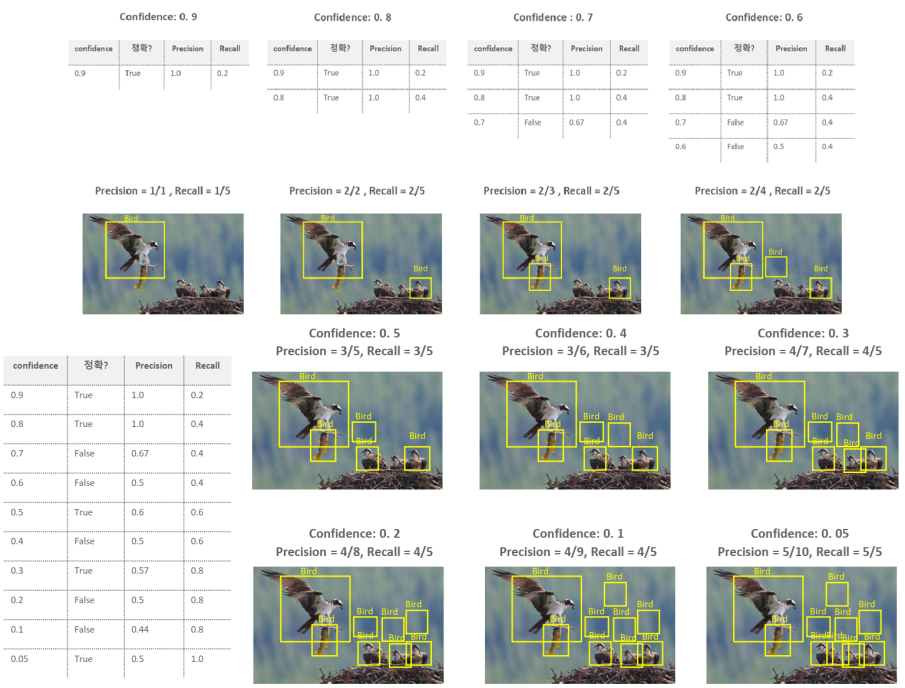

#### PR 커브

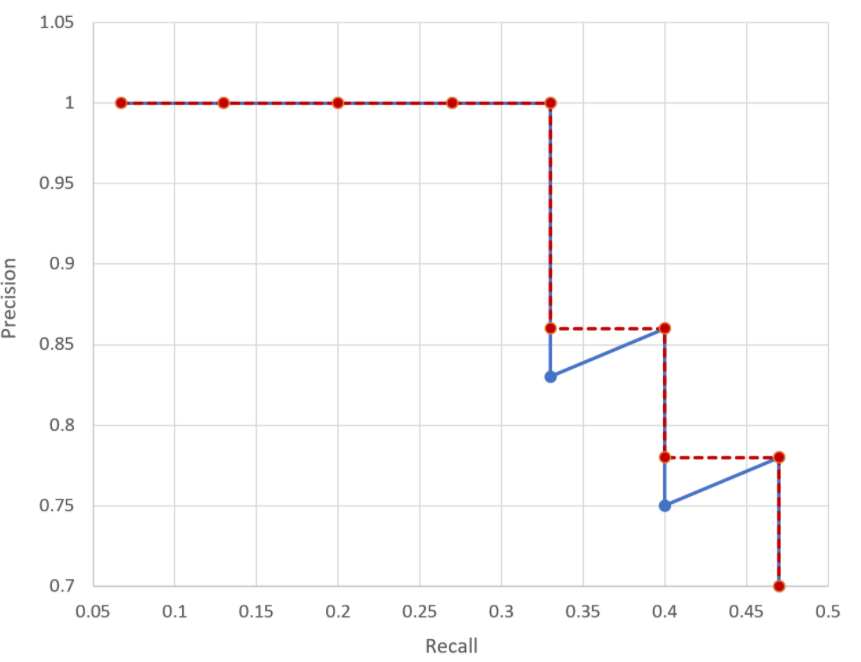

#### AP (Average Precision)
- PR Curve를 평가하기 위해, 여러점으로 계단형 곡선을 만들고, 그 면적(Area)을 구한 값
- 0~1, 1에 가까울수록 높은 정밀도랑 재현율을 유지하고 있다는 의미

#### mAP (mean AP)
- 여러 클래스(ex.나비에 대한 AP, 양에 대한 AP)에 대한 AP를 평균낸 값
- 객체 탐지에서 가장 기본적으로 사용되는 성능 지표

#### mAP50
- IoU 임계값을 0.5로 두고 계산한 mAP (YOLO에서 많이 활용)

### 모델의 개선방향 정리
- 데이터 점검, 증강 : 라벨 품질, 클래스 불균형, 데이터 다양성
- 학습 설정 최적화 : 학습률, 에폭 수, 배치사이즈 등
- 다른 모델 설정 : l, x 등
- Confidence 튜닝과 같은 후처리

#### 학습 된 모델 불러와서 사용해보기

In [4]:
best_model = YOLO("./runs/detect/train/weights/best.pt")

In [5]:
# 1개만 예측해보기
results = best_model("./AnimalDetection2class-1/test/images/OIP-0ZE9mPPRpHWA4dsFSbhPCwHaFF_jpeg.rf.20bb368da2fa6a1cc54d552622a579b1.jpg")


image 1/1 /content/drive/MyDrive/ESTCampAI/Deeplearning/AnimalDetection2class-1/test/images/OIP-0ZE9mPPRpHWA4dsFSbhPCwHaFF_jpeg.rf.20bb368da2fa6a1cc54d552622a579b1.jpg: 640x640 4 sheeps, 418.8ms
Speed: 9.4ms preprocess, 418.8ms inference, 36.0ms postprocess per image at shape (1, 3, 640, 640)


In [6]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'butterfly', 1: 'sheep'}
 obb: None
 orig_img: array([[[ 23,  31,  48],
         [ 24,  32,  49],
         [ 28,  36,  53],
         ...,
         [ 37,  53,  66],
         [ 39,  55,  68],
         [ 40,  56,  69]],
 
        [[ 21,  29,  46],
         [ 23,  31,  48],
         [ 28,  36,  53],
         ...,
         [ 37,  53,  66],
         [ 39,  55,  68],
         [ 39,  55,  68]],
 
        [[ 23,  31,  48],
         [ 25,  33,  50],
         [ 28,  36,  53],
         ...,
         [ 37,  53,  66],
         [ 39,  55,  68],
         [ 39,  55,  68]],
 
        ...,
 
        [[249, 252, 255],
         [249, 252, 255],
         [250, 251, 255],
         ...,
         [252, 252, 252],
         [252, 252, 252],
         [252, 252, 252]],
 
        [[253, 253, 255],
         [252, 252, 255],
         [248, 251, 255],
         ...,
   

In [8]:
# url 넣어서 예측해보기
results = best_model(
    "https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Papilio_xuthus.jpg/960px-Papilio_xuthus.jpg",
    save = True
)


WARNING ⚠️ Download failure, retrying 1/3 https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Papilio_xuthus.jpg/960px-Papilio_xuthus.jpg... HTTP Error 403: Forbidden
image 1/1 /content/drive/MyDrive/ESTCampAI/Deeplearning/960px-Papilio_xuthus.jpg: 640x640 1 butterfly, 228.8ms
Speed: 13.4ms preprocess, 228.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/drive/MyDrive/ESTCampAI/Deeplearning/runs/detect/predict


#### 결과 Ploting → 주피터 노트북
- OpenCV로 Ploting 수행 → GUI기반이라